In [2]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
player = pd.read_csv('data/baseball/player.csv', usecols=[0,1,13,14,15,16,17,18,19,20,21])
salary = pd.read_csv('data/baseball/salary.csv')
appearances = pd.read_csv('data/baseball/appearances.csv')
batting = pd.read_csv('data/baseball/batting.csv')
fielding = pd.read_csv('data/baseball/fielding.csv')
team = pd.read_csv('data/baseball/team.csv')
pitching = pd.read_csv('data/baseball/pitching.csv')

In [4]:
app_player = appearances.merge(player).sort_values(by=['year', 'team_id', 'player_id']).reset_index()

In [5]:
app_player['age'] = app_player.year - app_player.birth_year
app_player['years_in_mlb'] = app_player.year - app_player.debut.dropna().str[0:4].astype(int)

In [6]:
appearances['age'] = app_player.age
appearances['years_in_mlb'] = app_player.years_in_mlb

For the project, we are looking at the importance of salary for building a baseball team.

### Salary Over Time

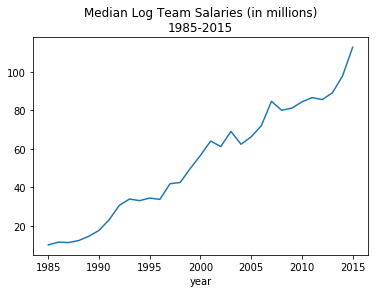

In [39]:
(salary.groupby(['year', 'team_id']).sum().groupby('year')['salary'].median() / 1000000).plot(
                                                title='Median Log Team Salaries (in millions)\n1985-2015')

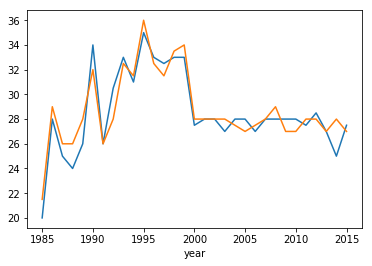

In [8]:
(salary[salary.league_id == 'AL'].groupby(['year', 'team_id']).size().groupby('year').median()).plot()
(salary[salary.league_id == 'NL'].groupby(['year', 'team_id']).size().groupby('year').median()).plot()

In [9]:
salary[salary.year == 2015].groupby('team_id')['salary'].sum().median() / salary[salary.year == 1985].groupby('team_id')['salary'].sum().median()

11.202202483475384

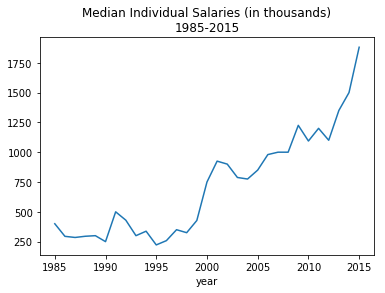

In [41]:
(salary.groupby('year')['salary'].median() / 1000).plot(title='Median Individual Salaries (in thousands)\n1985-2015')

In [11]:
for year in range(2011, 2016):
    stats = salary[(salary.league_id == 'AL') & (salary.year == year)].groupby(['team_id'])['salary'].sum().describe()
    print(f'{year}:\n{stats}\n')

2011:
count    1.400000e+01
mean     9.765480e+07
std      4.793501e+07
min      3.571200e+07
25%      6.355998e+07
50%      8.920493e+07
75%      1.240260e+08
max      2.022750e+08
Name: salary, dtype: float64

2012:
count    1.400000e+01
mean     1.043745e+08
std      4.438653e+07
min      5.537250e+07
25%      7.559540e+07
50%      8.803155e+07
75%      1.293527e+08
max      1.965223e+08
Name: salary, dtype: float64

2013:
count    1.500000e+01
mean     1.022085e+08
std      5.141290e+07
min      1.789070e+07
25%      7.467127e+07
50%      8.439333e+07
75%      1.252314e+08
max      2.319789e+08
Name: salary, dtype: float64

2014:
count    1.500000e+01
mean     1.018388e+08
std      3.967335e+07
min      3.511630e+07
25%      7.612299e+07
50%      9.253110e+07
75%      1.171217e+08
max      1.975439e+08
Name: salary, dtype: float64

2015:
count    1.600000e+01
mean     1.137962e+08
std      4.946412e+07
min      4.875000e+06
25%      8.551120e+07
50%      1.126830e+08
75%      1.275

In [12]:
for year in range(2011, 2016):
    stats = salary[(salary.league_id == 'NL') & (salary.year == year)].groupby(['team_id'])['salary'].sum().describe()
    print(f'{year}:\n{stats}\n')

2011:
count    1.600000e+01
mean     8.858363e+07
std      3.446501e+07
min      4.504700e+07
25%      6.212870e+07
50%      8.625001e+07
75%      1.086248e+08
max      1.729764e+08
Name: salary, dtype: float64

2012:
count    1.600000e+01
mean     9.196861e+07
std      2.892415e+07
min      5.524470e+07
25%      7.700339e+07
50%      8.551349e+07
75%      1.008157e+08
max      1.745389e+08
Name: salary, dtype: float64

2013:
count    1.500000e+01
mean     1.000932e+08
std      4.788972e+07
min      3.360190e+07
25%      7.567805e+07
50%      9.013200e+07
75%      1.100539e+08
max      2.233622e+08
Name: salary, dtype: float64

2014:
count    1.600000e+01
mean     1.040459e+08
std      5.201297e+07
min      4.500000e+06
25%      7.680492e+07
50%      9.773525e+07
75%      1.235157e+08
max      2.170146e+08
Name: salary, dtype: float64

2015:
count    1.500000e+01
mean     1.128935e+08
std      4.078062e+07
min      5.695900e+07
25%      9.229055e+07
50%      1.116930e+08
75%      1.188

### Distributions

#### By year (individual players)

In [25]:
salary_app = salary.merge(appearances)

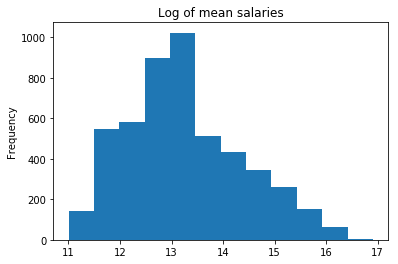

In [13]:
np.log(salary.groupby('player_id')['salary'].mean()).plot(kind='hist', bins=12, title='Log of mean salaries')

In [31]:
def distribution_salary(year,starters=False):
    if starters:
        np.log(salary_app[(salary_app.year == year) & (salary_app.gs > 80)].salary).plot(
            kind='hist', bins=20, title=f'Log salaries for starters in {year}')
    else:
        np.log(salary[(salary.year == year)].salary).plot(kind='hist', bins=20, title=f'Log salaries in {year}')

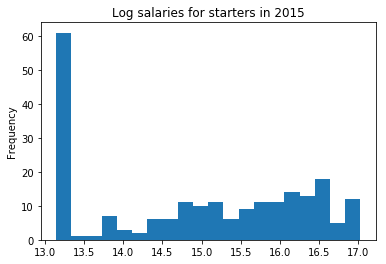

In [32]:
distribution_salary(2015,starters=True)

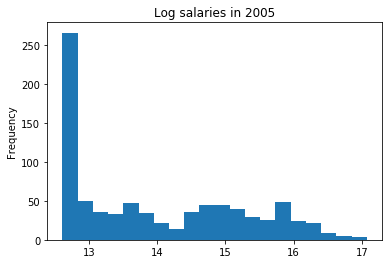

In [16]:
distribution_salary(2005)

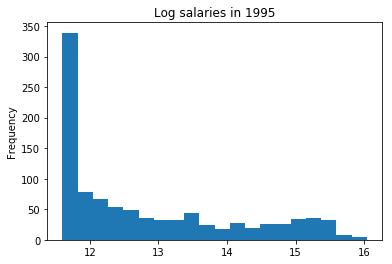

In [17]:
distribution_salary(1995)

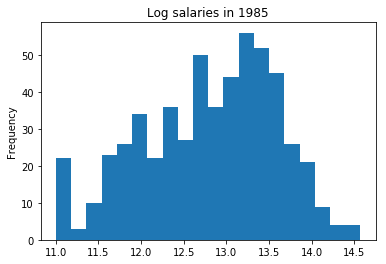

In [18]:
distribution_salary(1985)

1985 is the only year in which the distributions of individual salaries appears to be fairly normal.

#### By year (team totals)

In [19]:
team_salary = team.merge(salary)
winners = team_salary[(team_salary.w / team_salary.l) >= 1]
losers = team_salary[(team_salary.w / team_salary.l) < 1]

In [20]:
def distribution_team_salary(year):
    np.log(winners[(winners.year == year)].groupby('team_id')['salary'].sum()).plot(
        kind='hist', bins=8, title=f'Log team salaries {year}', alpha=0.5)
    np.log(losers[(losers.year == year)].groupby('team_id')['salary'].sum()).plot(
        kind='hist', bins=8, title=f'Log team salaries {year}', alpha=0.5)

Blue bars represent teams with a record better than .500, orange bars are teams with less than .500.

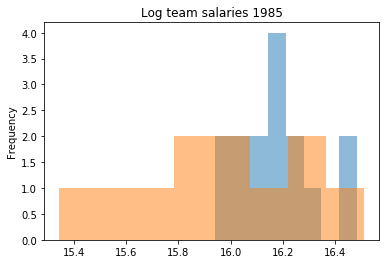

In [21]:
distribution_team_salary(1985)

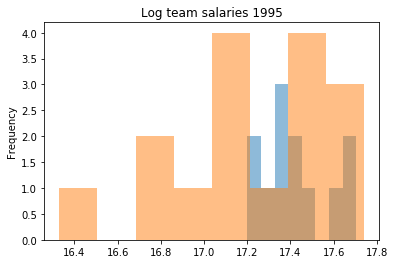

In [22]:
distribution_team_salary(1995)

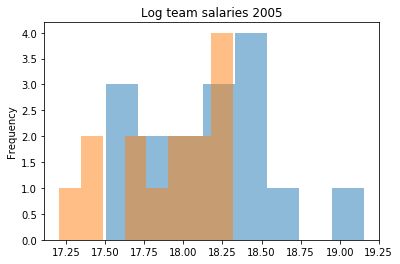

In [23]:
distribution_team_salary(2005)

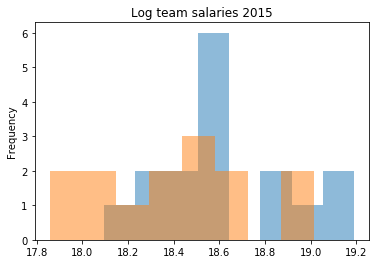

In [24]:
distribution_team_salary(2015)

In [ ]:
(salary[salary.year == 2015].groupby('team_id')['salary'].sum() / 1000000).describe()

### Scatterplots and Regressions

#### Do Higher Team Salaries Translate to More Wins?

In [26]:
team_salary = team.merge(salary).drop(1994)

In [27]:
def salary_year(year):
    team_salary_year = team_salary[team_salary.year == year]
    wins = team_salary_year.groupby('team_id')['w'].median()
    salary_total = team_salary_year.groupby('team_id')['salary'].sum()
    rel_salary_total = (salary_total - salary_total.mean()) / salary_total.std()
    ws = team_salary_year[team_salary_year.ws_win == 'Y']
    ws_salary = (ws.groupby('team_id')['salary'].sum() - salary_total.mean()) / salary_total.std()
    ws_wins = ws.groupby('team_id')['w'].median()
    return wins, salary_total

In [28]:
def wins_salary_graph(year):
    wins, salary_total = salary_year(year)
    plt.scatter(salary_total, wins)
    plt.ylabel("Team wins")
    plt.xlabel("Difference in team salary from mean by std")
    plt.title(f"How does salary impact wins?\n{year} season")

In [29]:
def salary_total():
    wins = team_salary.groupby(['year','team_id'])['w'].median().reset_index('year').drop('year',axis=1)
    salary_total = team_salary.groupby(['year','team_id'])['salary'].sum()
    rel_salary_total = (salary_total.xs(1985) - salary_total.xs(1985).mean()) / salary_total.xs(1985).std()
    for year in range(1986,2016):
        rel_salary = (salary_total.xs(year) - salary_total.xs(year).mean()) / salary_total.xs(year).std()
        rel_salary_total = pd.concat([rel_salary_total,rel_salary])
    return wins, rel_salary_total

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/jnelson/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
# For all years
y, X = salary_total()
X = sm.add_constant(X)
results = smf.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     109.4
Date:                Fri, 17 Nov 2017   Prob (F-statistic):           3.19e-24
Time:                        16:40:25   Log-Likelihood:                -3405.6
No. Observations:                 888   AIC:                             6815.
Df Residuals:                     886   BIC:                             6825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.9110      0.376    212.307      0.0

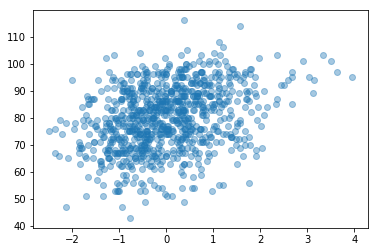

In [32]:
wins, salary_total = salary_total()
plt.scatter(salary_total, wins, alpha=0.4)

In [33]:
(team_salary[(team_salary.year == 2015)].groupby(['year', 'team_id'])['salary'].sum() / 1000000).describe()

count     30.000000
mean     116.975586
std       40.611048
min       56.959000
25%       90.591524
50%      112.683050
75%      121.657879
max      215.792000
Name: salary, dtype: float64

In [34]:
for year in range(1985, 2016):
    y, X = salary_year(year)
    X = np.log(X)
    X = sm.add_constant(X)
    results = smf.OLS(y, X).fit()
    print(f'\nFor {year}:\n{results.summary()}')


For 1985:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     3.505
Date:                Fri, 17 Nov 2017   Prob (F-statistic):             0.0734
Time:                        16:40:26   Log-Likelihood:                -100.43
No. Observations:                  26   AIC:                             204.9
Df Residuals:                      24   BIC:                             207.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -187.4236    143.288     -1.3


For 1994:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     3.868
Date:                Fri, 17 Nov 2017   Prob (F-statistic):             0.0600
Time:                        16:40:26   Log-Likelihood:                -94.060
No. Observations:                  28   AIC:                             192.1
Df Residuals:                      26   BIC:                             194.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -109.7183     84.840     -1.2


For 2005:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     10.94
Date:                Fri, 17 Nov 2017   Prob (F-statistic):            0.00259
Time:                        16:40:26   Log-Likelihood:                -108.59
No. Observations:                  30   AIC:                             221.2
Df Residuals:                      28   BIC:                             224.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -171.1024     76.245     -2.2

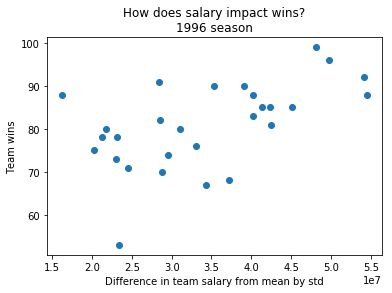

In [35]:
wins_salary_graph(1996)

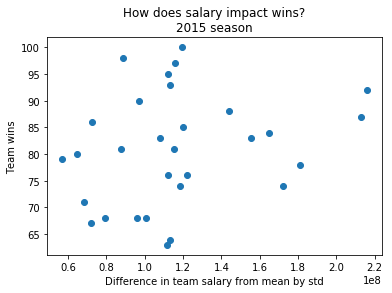

In [36]:
wins_salary_graph(2015)

#### What about the spread of salaries?

In [40]:
def salary_dist_year(year):
    team_salary_year = team_salary[team_salary.year == year]
    wins = team_salary_year.groupby('team_id')['w'].median()
    salary_total = team_salary_year.groupby('team_id')['salary'].sum()
    salary_dist = team_salary_year.groupby('team_id')['salary'].std()
    return wins, salary_total, salary_dist

In [41]:
for year in range(1985, 2016):
    y, X1, X2 = salary_dist_year(year)
    X = pd.concat([X1,X2],axis=1)
    X = np.log(X)
    X = sm.add_constant(X)
    results = smf.OLS(y, X).fit()
    print(f'\nFor {year}:\n{results.summary()}')


For 1985:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     2.390
Date:                Tue, 14 Nov 2017   Prob (F-statistic):              0.114
Time:                        12:29:05   Log-Likelihood:                -99.749
No. Observations:                  26   AIC:                             205.5
Df Residuals:                      23   BIC:                             209.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -193.4270    142.681     -1.3


For 1997:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.864
Date:                Tue, 14 Nov 2017   Prob (F-statistic):              0.176
Time:                        12:29:05   Log-Likelihood:                -100.62
No. Observations:                  28   AIC:                             207.2
Df Residuals:                      25   BIC:                             211.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.3657     76.980     -0.8


For 2008:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     2.138
Date:                Tue, 14 Nov 2017   Prob (F-statistic):              0.137
Time:                        12:29:05   Log-Likelihood:                -112.02
No. Observations:                  30   AIC:                             230.0
Df Residuals:                      27   BIC:                             234.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -116.2593     96.729     -1.2

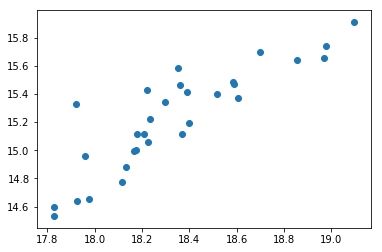

In [42]:
y, X1, X2 = salary_dist_year(2012)
X = pd.concat([X1,X2],axis=1)
plt.scatter(np.log(X1),np.log(X2))

### Salary by Position

In [43]:
appearances['str_pos'] = appearances[['g_p', 'g_c', 'g_1b', 'g_2b', 'g_3b', 'g_ss',
                                'g_lf', 'g_cf', 'g_rf', 'g_dh']].idxmax(axis=1).str.replace('g_', '')

In [65]:
appearances[appearances.year > 1984].str_pos.value_counts()

p     18971
c      3172
lf     2857
2b     2308
rf     2250
3b     2230
1b     2171
ss     1999
cf     1978
dh      810
Name: str_pos, dtype: int64

#### Do starters play more seasons than non-starters?

A friend suggested there may be a relationship between number of games played per year and how long a player remains in the MLB. The scatterplot below shows somewhat of a U-shaped relationship between the two. The cluster in the bottom-left are a majority of players who rarely start games and only play in the MLB for a few years.

In [45]:
app_salary = appearances.merge(salary)

In [46]:
seasons = app_salary.groupby('player_id').size()
gs = app_salary.groupby('player_id')['gs'].mean()
g = app_salary.groupby('player_id')['g_all'].mean()
age = app_salary.groupby('player_id')['age'].max()

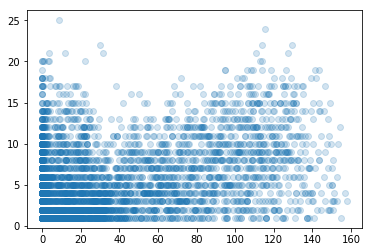

In [47]:
plt.scatter(gs, seasons, alpha=0.2)

#### Salary by position

In [51]:
app_salary[app_salary.year == 2015].groupby('str_pos')['salary'].median() / 1000000

str_pos
1b    3.10000
2b    1.07500
3b    2.52500
c     1.03750
cf    1.65000
dh    6.58300
lf    2.10000
p     1.48000
rf    4.10000
ss    1.44375
Name: salary, dtype: float64

In [52]:
positions = {}
for pos in ['p', 'c', '1b', '2b', '3b', 'ss', 'lf', 'cf', 'rf', 'dh']:
    positions[(pos.replace('', ''))] = app_salary[app_salary.str_pos == pos]

In [61]:
def distribution_salary_pos(year, pos, title):
    pos_df = app_salary[app_salary.str_pos == pos]
    np.log(pos_df[(pos_df.year == year)].groupby('player_id')['salary'].mean()).plot(
        kind='hist', bins=10, title=f'Log salaries for {title} in {year}', alpha=0.4)

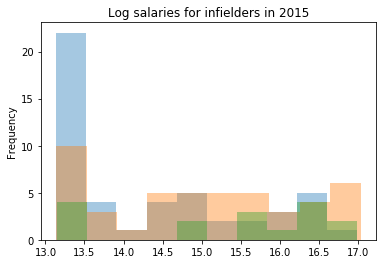

In [62]:
distribution_salary_pos(2015, '2b', 'infielders')
distribution_salary_pos(2015, '1b', 'infielders')
distribution_salary_pos(2015, 'dh', 'infielders')

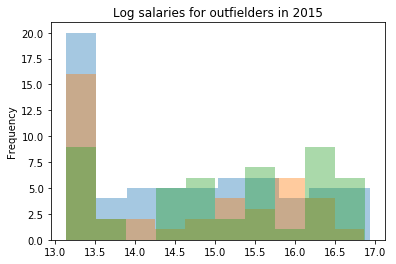

In [63]:
distribution_salary_pos(2015, 'lf', 'outfielders')
distribution_salary_pos(2015, 'cf', 'outfielders')
distribution_salary_pos(2015, 'rf', 'outfielders')

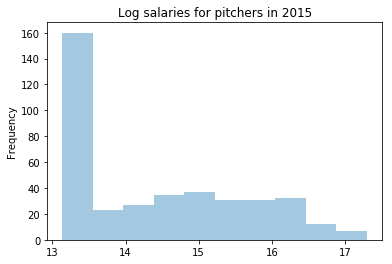

In [64]:
distribution_salary_pos(2015, 'p', 'pitchers')

### Player Features

In [54]:
features = app_salary

In [55]:
features = features.merge(player)

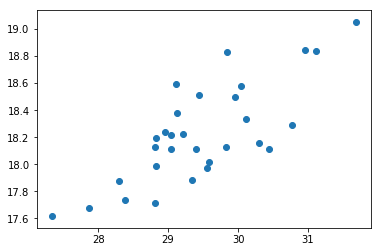

In [56]:
team_age = features[features.year == 2012].groupby('team_id')['age'].mean()
team_salary = features[features.year == 2012].groupby('team_id')['salary'].sum()
plt.scatter(team_age, np.log(team_salary))

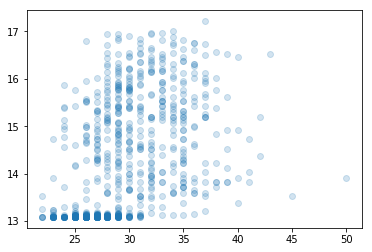

In [57]:
plt.scatter(features[features.year == 2012].age, np.log(features[features.year == 2012].salary), alpha=0.2)

In [69]:
salary_pitch = salary.merge(pitching)

In [70]:
salary_bat = salary.merge(batting).set_index('player_id').drop(salary_pitch.player_id).reset_index()

In [59]:
def bat_pitch_salary(year):
    bat_year = salary_bat[salary_bat.year == year]
    pitch_year = salary_pitch[salary_pitch.year == year]
    team_year = team[team.year == year]
    wins = team_year.groupby('team_id')['w'].median()
    team_bat = bat_year.groupby(['team_id'])['salary'].sum() / bat_year.groupby(['team_id']).size()
    team_pitch = pitch_year.groupby(['team_id'])['salary'].sum() / pitch_year.groupby(['team_id']).size()
    return wins, (team_bat / (team_pitch + team_bat))

In [44]:
def bat_pitch(year):
    bat_year = salary_bat[salary_bat.year == year]
    pitch_year = salary_pitch[salary_pitch.year == year]
    team_year = team[team.year == year]
    wins = team_year.groupby('team_id')['w'].median()
    team_bat = bat_year.groupby(['team_id']).size()
    team_pitch = pitch_year.groupby(['team_id']).size()
    return wins, (team_bat / (team_pitch + team_bat))

In [60]:
for year in range(1985, 2016):
    y, X = bat_pitch_salary(year)
    X = np.log(X)
    X = sm.add_constant(X)
    results = smf.OLS(y, X).fit()
    print(f'\nFor {year}:\n{results.summary()}')


For 1985:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                   0.06550
Date:                Thu, 16 Nov 2017   Prob (F-statistic):              0.800
Time:                        15:55:06   Log-Likelihood:                -102.17
No. Observations:                  26   AIC:                             208.3
Df Residuals:                      24   BIC:                             210.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.5713     12.893      6.0


For 1998:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9597
Date:                Thu, 16 Nov 2017   Prob (F-statistic):              0.336
Time:                        15:55:06   Log-Likelihood:                -119.70
No. Observations:                  30   AIC:                             243.4
Df Residuals:                      28   BIC:                             246.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.4046      7.172     10.3


For 2010:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.3385
Date:                Thu, 16 Nov 2017   Prob (F-statistic):              0.565
Time:                        15:55:07   Log-Likelihood:                -113.83
No. Observations:                  30   AIC:                             231.7
Df Residuals:                      28   BIC:                             234.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.3958      7.824     10.9

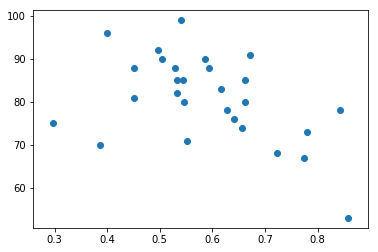

In [67]:
y, X = bat_pitch_salary(1996)
plt.scatter(X,y)

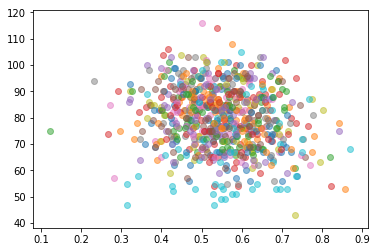

In [85]:
for year in range(1985,2011):
    y, X = bat_pitch_salary(year)
    plt.scatter(X,y,alpha=0.5)

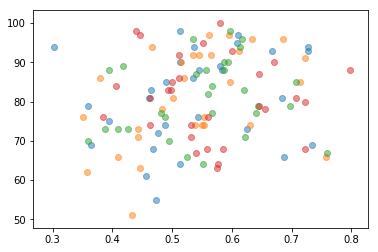

In [86]:
for year in range(2012,2016):
    y, X = bat_pitch_salary(year)
    plt.scatter(X,y,alpha=0.5)

In [71]:
salary_bat[salary_bat.year == 2015].groupby(['team_id'])['salary'].sum() / 1000000

team_id
ARI     36.775500
ATL     45.537500
BAL     50.690833
BOS    108.834900
CHA     33.790000
CHN     43.580310
CIN     59.605000
CLE     44.321166
COL     57.622600
DET     79.399750
HOU     38.078100
KCA     55.532025
LAA     59.391915
LAN    114.088500
MIA     25.671500
MIL     55.849000
MIN     51.497500
NYA    133.914557
NYN     53.608728
OAK     35.473500
PHI     60.614000
PIT     40.813333
SDN     62.880200
SEA     70.843500
SFN     69.806500
SLN     69.186000
TBA     43.488066
TEX     99.482889
TOR     69.975600
WAS     74.079172
Name: salary, dtype: float64

In [75]:
salary_pitch[salary_pitch.year == 2015].groupby(['team_id'])['salary'].sum() / 1000000

team_id
ARI     20.183500
ATL     24.943750
BAL     50.254000
BOS     60.997500
CHA     78.583700
CHN     72.299000
CIN     50.967286
CLE     28.342600
COL     24.066000
DET     92.365000
HOU     33.664200
KCA     56.575000
LAA     59.626000
LAN    101.703500
MIA     39.635000
MIL     44.176000
MIN     56.257500
NYA     78.837400
NYN     34.140075
OAK     40.230001
PHI     48.579000
PIT     45.029166
SDN     55.561100
SEA     51.365200
SFN     94.895000
SLN     50.055500
TBA     19.333167
TEX     41.309900
TOR     43.016800
WAS     81.508300
Name: salary, dtype: float64